In [ ]:
# carichiamo i pacchetti e i moduli necessari, compreso il dataset 

In [319]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [320]:
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.callbacks import Callback
from keras.layers.core import Dense, Activation
from keras import layers
from keras.optimizers import SGD
from keras.utils import np_utils

In [321]:
# carichiamo il dataset dividendolo nei dati di train e di test

In [322]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [323]:
# visualizziamo alcune immagini

In [324]:
print("x_train: "+str(x_train.shape))
print("x_test: "+str(y_train.shape))
print("y_train: "+str(x_test.shape))
print("y_test: "+str(y_test.shape))

x_train: (60000, 28, 28)
x_test: (60000,)
y_train: (10000, 28, 28)
y_test: (10000,)


In [325]:
etichette = set(y_train)

In [326]:
etichette

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

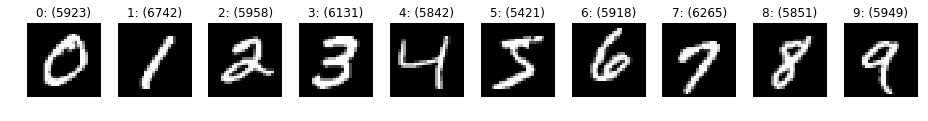

In [327]:
plt.figure(figsize=(16, 16))

i = 1
for e in etichette:
 image = x_train[y_train.tolist().index(e)]
 plt.subplot(10, 10, i)
 plt.axis('off')
 plt.title("{0}: ({1})".format(e, y_train.tolist().count(e)))
 i += 1
 _ = plt.imshow(image, cmap='gray')

In [328]:
# struttura degli oggetti di test

In [329]:
x_train.shape

(60000, 28, 28)

In [330]:
y_train.shape

(60000,)

In [331]:
x_test.shape

(10000, 28, 28)

In [332]:
y_test.shape

(10000,)

In [333]:
# effettuiamo il reshaping dei dati

In [334]:
# dal momento che ogni pixel ha un valore compreso tra 0 e 255 
# possiamo convertire i valori dividendo per 255

In [335]:
x_train = np.reshape(x_train, (60000, 784))
x_test = np.reshape(x_test, (10000, 784))

In [336]:
print("x_train: "+str(x_train.shape))
print("x_test: "+str(y_train.shape))
print("y_train: "+str(x_test.shape))
print("y_test: "+str(y_test.shape))

x_train: (60000, 784)
x_test: (60000,)
y_train: (10000, 784)
y_test: (10000,)


In [337]:
x_train.dtype

dtype('uint8')

In [338]:
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

In [339]:
x_train.dtype

dtype('float32')

In [340]:
# le variabili di classificazione vanno ricodificate con l'one-hot

In [341]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [303]:
x_train.shape

(60000, 784)

In [304]:
# modello più semplice

model1 = Sequential()
model1.add(Dense(10, input_shape=(784,)))
model1.add(Activation('softmax'))

In [305]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 10)                7850      
_________________________________________________________________
activation_10 (Activation)   (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [306]:
model1.compile(loss='categorical_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])

In [307]:
y_train.shape

(60000, 10)

In [308]:
history = model1.fit(x_train, y_train,
                    batch_size=128, epochs=10,
                    verbose=1, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 1s 21us/step - loss: 0.7543 - acc: 0.8142 - val_loss: 0.4077 - val_acc: 0.8963
Epoch 2/10
48000/48000 [==============================] - 1s 15us/step - loss: 0.3894 - acc: 0.8967 - val_loss: 0.3339 - val_acc: 0.9108
Epoch 3/10
48000/48000 [==============================] - 1s 15us/step - loss: 0.3380 - acc: 0.9073 - val_loss: 0.3065 - val_acc: 0.9160
Epoch 4/10
48000/48000 [==============================] - 1s 15us/step - loss: 0.3143 - acc: 0.9136 - val_loss: 0.2932 - val_acc: 0.9197
Epoch 5/10
48000/48000 [==============================] - 1s 16us/step - loss: 0.3004 - acc: 0.9164 - val_loss: 0.2840 - val_acc: 0.9219
Epoch 6/10
48000/48000 [==============================] - 1s 15us/step - loss: 0.2904 - acc: 0.9193 - val_loss: 0.2775 - val_acc: 0.9244
Epoch 7/10
48000/48000 [==============================] - 1s 16us/step - loss: 0.2835 - acc: 0.9201 - val_loss: 0.2724 - val_acc

In [309]:
score = model1.evaluate(x_test, y_test, verbose=1)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 0s 19us/step

Test score: 1.3126311851739898
Test accuracy: 0.9174


In [158]:
# secondo modello con keras

In [33]:
model2 = Sequential()
model2.add(Dense(700, input_dim=784, activation='relu'))
model2.add(Dense(700, activation='relu'))
model2.add(Dense(350, activation='relu')) 
model2.add(Dense(100, activation='relu')) 
model2.add(Dense(10, activation='softmax'))

In [34]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 700)               549500    
_________________________________________________________________
dense_8 (Dense)              (None, 700)               490700    
_________________________________________________________________
dense_9 (Dense)              (None, 350)               245350    
_________________________________________________________________
dense_10 (Dense)             (None, 100)               35100     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1010      
Total params: 1,321,660
Trainable params: 1,321,660
Non-trainable params: 0
_________________________________________________________________


In [35]:
model2.compile(loss='categorical_crossentropy',
              optimizer= SGD(),
              metrics=['accuracy'])

In [36]:
history = model2.fit(x_train, y_train,
                    batch_size = 128, epochs = 10,
                    verbose = 1, validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 8s - loss: 1.2422 - acc: 0.6875 - val_loss: 0.4880 - val_acc: 0.8782
Epoch 2/10
48000/48000 [==============================] - 8s - loss: 0.4100 - acc: 0.8890 - val_loss: 0.3319 - val_acc: 0.9035
Epoch 3/10
48000/48000 [==============================] - 8s - loss: 0.3167 - acc: 0.9096 - val_loss: 0.2744 - val_acc: 0.9210
Epoch 4/10
48000/48000 [==============================] - 8s - loss: 0.2760 - acc: 0.9205 - val_loss: 0.2471 - val_acc: 0.9283
Epoch 5/10
48000/48000 [==============================] - 8s - loss: 0.2464 - acc: 0.9290 - val_loss: 0.2257 - val_acc: 0.9333
Epoch 6/10
48000/48000 [==============================] - 8s - loss: 0.2242 - acc: 0.9355 - val_loss: 0.2137 - val_acc: 0.9378
Epoch 7/10
48000/48000 [==============================] - 8s - loss: 0.2064 - acc: 0.9402 - val_loss: 0.1937 - val_acc: 0.9443
Epoch 8/10
48000/48000 [==============================] - 8s 

In [38]:
score = model2.evaluate(x_test, y_test, verbose=1)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

 9600/10000 [===========================>..] - ETA: 0s
Test score: 0.16747013177722692
Test accuracy: 0.9511


In [39]:
# terzo modello con keras

In [57]:
image_height, image_width = 28, 28
x_train = x_train.reshape(x_train.shape[0], image_height, image_width, 1)
x_test = x_test.reshape(x_test.shape[0], image_height, image_width, 1)
input_shape = (image_height, image_width, 1)

In [59]:
model3 = Sequential()

model3.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model3.add(layers.MaxPooling2D(pool_size=(2, 2)))

model3.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model3.add(layers.MaxPooling2D(pool_size=(2, 2)))

model3.add(layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model3.add(layers.MaxPooling2D(pool_size=(2, 2)))

model3.add(layers.Dropout(0.5))
model3.add(layers.Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(layers.Dropout(0.5))
model3.add(Dense(10, activation='softmax'))

model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model3.summary()

model3.fit(x_train, y_train, batch_size = 128, epochs= 10, verbose=1, validation_split=0.2)


score = model3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 13, 13, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 6, 6, 256)         295168    
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 3, 3, 256)         0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 3, 3, 256)         0         
__________

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 196s - loss: 0.3429 - acc: 0.8889 - val_loss: 0.0593 - val_acc: 0.9826
Epoch 2/10
48000/48000 [==============================] - 189s - loss: 0.1030 - acc: 0.9688 - val_loss: 0.0437 - val_acc: 0.9870
Epoch 3/10
48000/48000 [==============================] - 186s - loss: 0.0756 - acc: 0.9775 - val_loss: 0.0405 - val_acc: 0.9874
Epoch 4/10
48000/48000 [==============================] - 184s - loss: 0.0648 - acc: 0.9808 - val_loss: 0.0314 - val_acc: 0.9911
Epoch 5/10
48000/48000 [==============================] - 183s - loss: 0.0549 - acc: 0.9830 - val_loss: 0.0331 - val_acc: 0.9912
Epoch 6/10
48000/48000 [==============================] - 183s - loss: 0.0488 - acc: 0.9849 - val_loss: 0.0299 - val_acc: 0.9910
Epoch 7/10
48000/48000 [==============================] - 183s - loss: 0.0423 - acc: 0.9876 - val_loss: 0.0276 - val_acc: 0.9914
Epoch 8/10
48000/48000 [=======================

In [62]:
score = model3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02195702614013885
Test accuracy: 0.9934


In [ ]:
pred = model3.predict(x_test)

In [ ]:

# mettiamo a confronto i risultati effettivi con quelli ottenuti dal nostro modello

esempi = 10
plt.figure(figsize=(16, 16))
for i in range(esempi):
    ax = plt.subplot(2, esempi, i + 1)
    plt.imshow(x_test[i, :, :, 0], cmap='gray')
    plt.title("cl. effettiva: {}\npredizioni: {}".format(np.argmax(y_test[i]), np.argmax(pred[i])))
    plt.axis('off')

In [ ]:
# salviamo il nostro modello e ricarichiamolo

In [194]:
model3.save("mnist_model3.h5")

In [195]:
from keras.models import load_model

In [196]:
model3 = load_model("mnist_model3.h5")